In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [182]:
import sklearn
from sklearn.datasets import load_diabetes

In [183]:
data = load_diabetes()

In [184]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [185]:
dataset = pd.DataFrame(data.data,columns = data.feature_names)

In [186]:
dataset["target"] = data.target

In [187]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [188]:
dataset.shape

(442, 11)

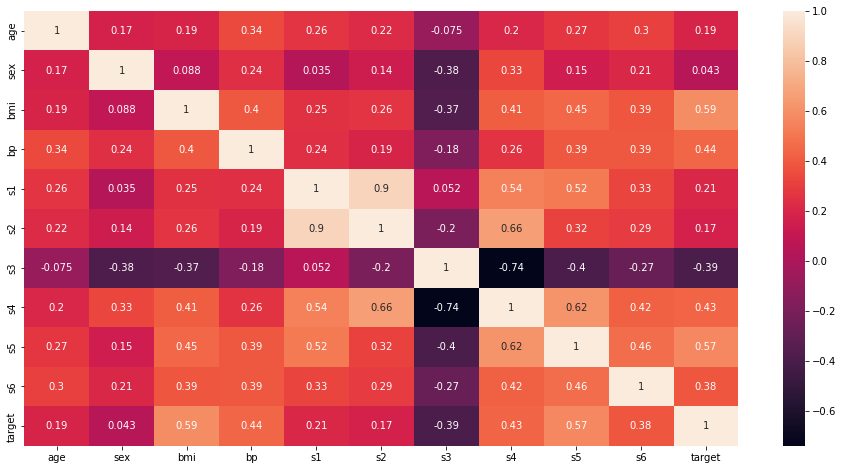

In [189]:
plt.figure(figsize = (16,8))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

age


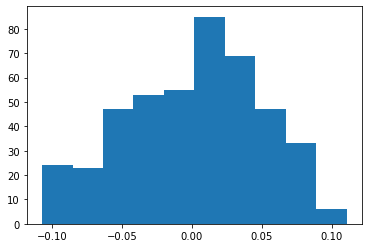

sex


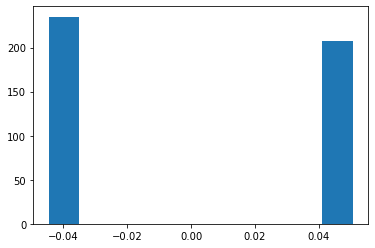

bmi


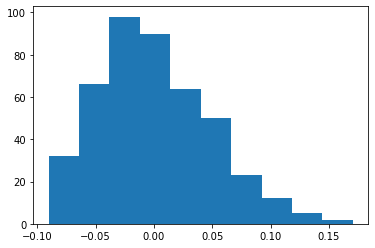

bp


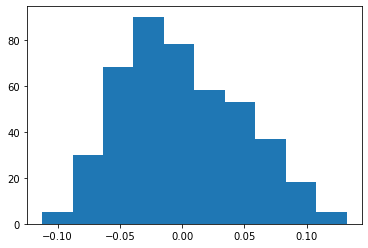

s1


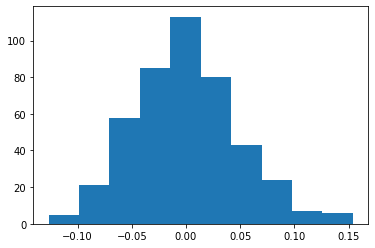

s2


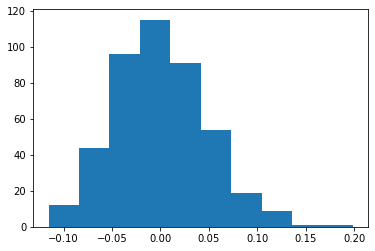

s3


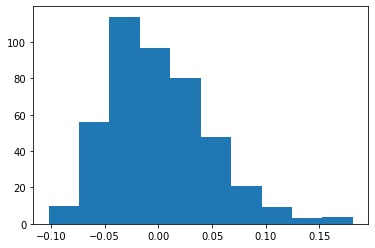

s4


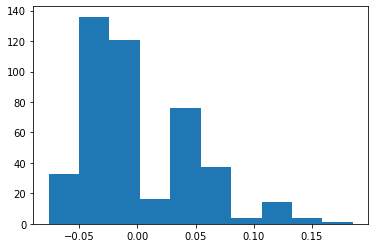

s5


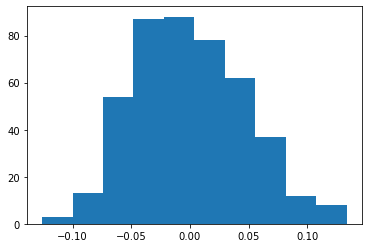

s6


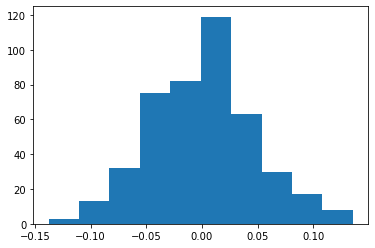

target


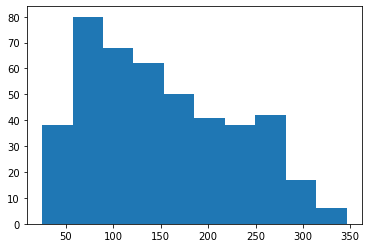

In [190]:
for i in dataset.columns:
    print(i)
    plt.hist(dataset[i])
    plt.show()

age


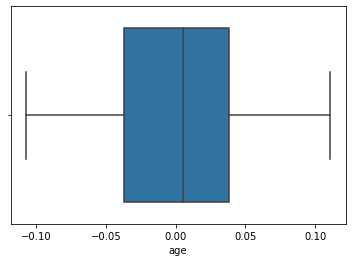

sex


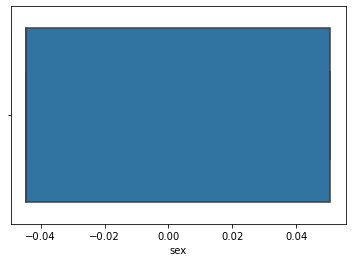

bmi


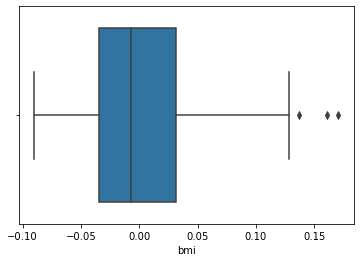

bp


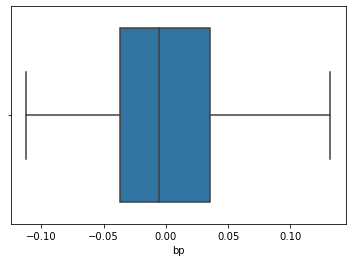

s1


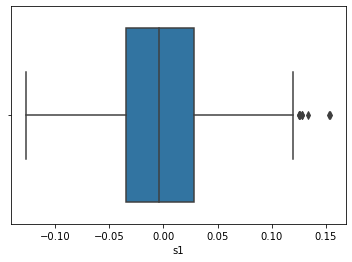

s2


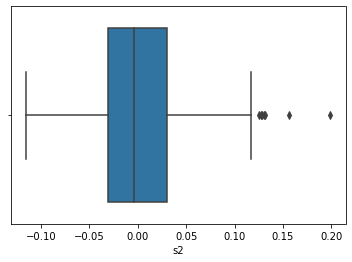

s3


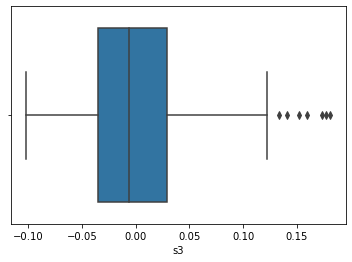

s4


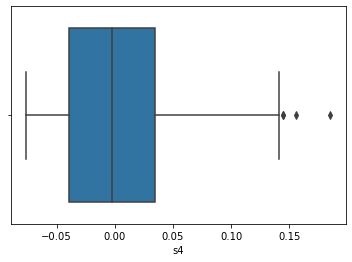

s5


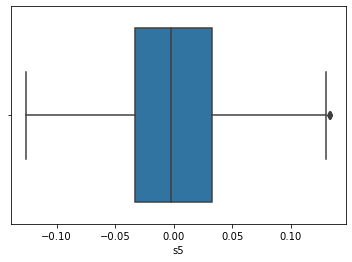

s6


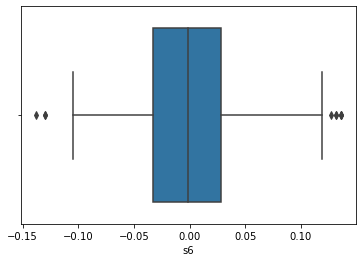

target


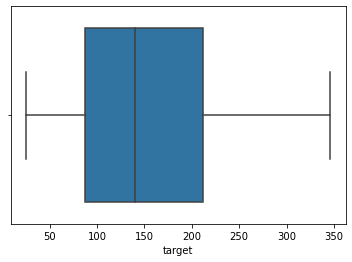

In [191]:
for i in dataset.columns:
    print(i)
    sns.boxplot(dataset[i])
    plt.show()

In [192]:
features = data.feature_names

In [193]:
for i in features:
    q1 = np.percentile(dataset[i],25)
    q3 = np.percentile(dataset[i],75)
    iqr = q3 - q1
    lc = q1 - iqr*1.5
    up = q3 + iqr*1.5
    dataset[i] = dataset[i].clip(lc,up)

age


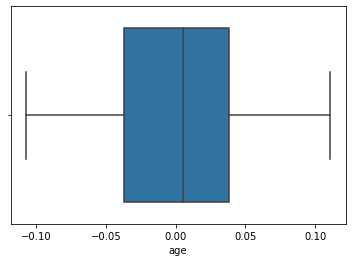

sex


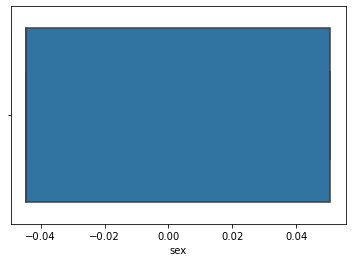

bmi


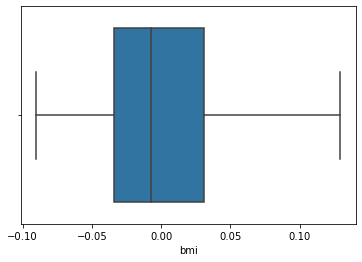

bp


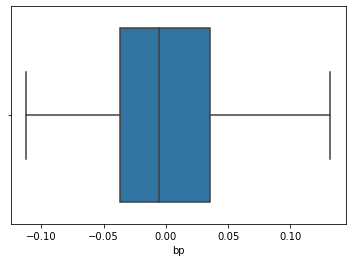

s1


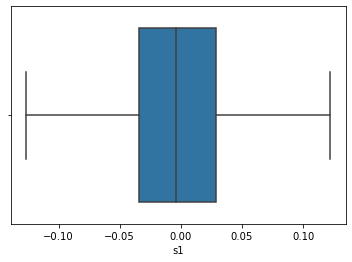

s2


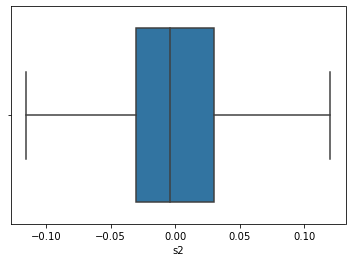

s3


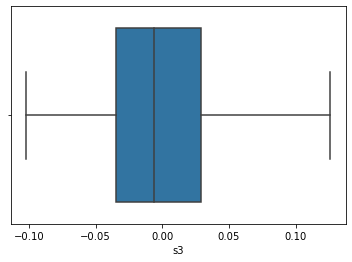

s4


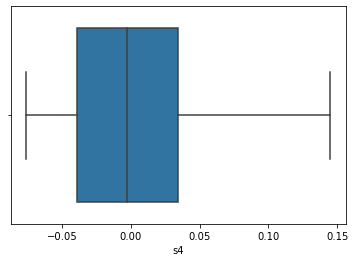

s5


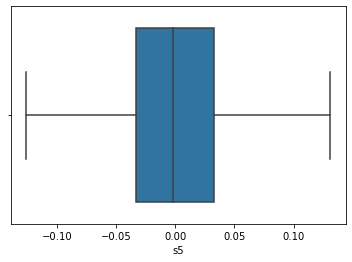

s6


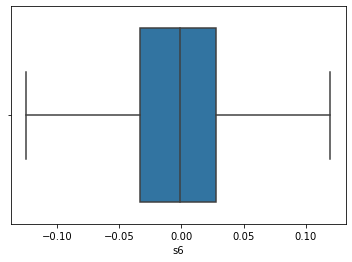

target


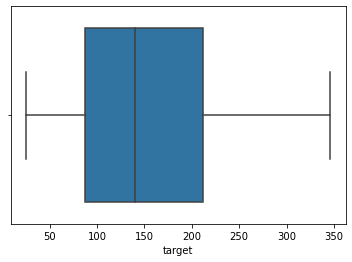

In [194]:
for i in dataset.columns:
    print(i)
    sns.boxplot(dataset[i])
    plt.show()

In [195]:
dataset_2 = dataset.copy()

In [196]:
dataset_2 = dataset_2.drop(["s2","target"],axis = 1)

In [197]:
dataset_2.head()

,age,sex,bmi,bp,s1,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.002592,-0.031991,-0.046641


In [198]:
y = data.target

In [199]:
X = dataset_2

In [200]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_norm = MinMaxScaler()
scaler_stad = StandardScaler()

In [201]:
X_normalized = scaler_norm.fit_transform(X)
X_standardized = scaler_stad.fit_transform(X)

X_standardized_normalized = scaler_stad.fit_transform(X_normalized)

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [203]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [204]:
lr = LinearRegression()
lr.fit(x_train,y_train)
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

print("train r2 score",r2_score(y_train,train_pred))
print("test r2 score",r2_score(y_test,test_pred))

train r2 score 0.5078328853989785
test r2 score 0.5289539915330217


In [205]:
svr = SVR()
svr.fit(x_train,y_train)
train_pred = svr.predict(x_train)
test_pred = svr.predict(x_test)

print("train r2 score",r2_score(y_train,train_pred))
print("test r2 score",r2_score(y_test,test_pred))

train r2 score 0.16812788892463204
test r2 score 0.15368515965442675


In [206]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
train_pred = rfr.predict(x_train)
test_pred = rfr.predict(x_test)

print("train r2 score",r2_score(y_train,train_pred))
print("test r2 score",r2_score(y_test,test_pred))

train r2 score 0.9142605636112225
test r2 score 0.515729528493573


In [207]:
x_train,x_test,y_train,y_test = train_test_split(X_normalized,y,test_size = 0.2,random_state = 5)

In [208]:
lr = LinearRegression()
lr.fit(x_train,y_train)
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

print("train r2 score",r2_score(y_train,train_pred))
print("test r2 score",r2_score(y_test,test_pred))

train r2 score 0.5078328853989784
test r2 score 0.5289539915330218


In [209]:
svr = SVR()
svr.fit(x_train,y_train)
train_pred = svr.predict(x_train)
test_pred = svr.predict(x_test)

print("train r2 score",r2_score(y_train,train_pred))
print("test r2 score",r2_score(y_test,test_pred))

train r2 score 0.15279665867502967
test r2 score 0.12852492537201243


In [210]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
train_pred = rfr.predict(x_train)
test_pred = rfr.predict(x_test)

print("train r2 score",r2_score(y_train,train_pred))
print("test r2 score",r2_score(y_test,test_pred))

train r2 score 0.9184588840269734
test r2 score 0.5339024342073835


In [211]:
x_train,x_test,y_train,y_test = train_test_split(X_standardized,y,test_size = 0.2,random_state = 5)

In [212]:
lr = LinearRegression()
lr.fit(x_train,y_train)
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

print("train r2 score",r2_score(y_train,train_pred))
print("test r2 score",r2_score(y_test,test_pred))

train r2 score 0.5078328853989784
test r2 score 0.5289539915330219


In [213]:
svr = SVR()
svr.fit(x_train,y_train)
train_pred = svr.predict(x_train)
test_pred = svr.predict(x_test)

print("train r2 score",r2_score(y_train,train_pred))
print("test r2 score",r2_score(y_test,test_pred))

train r2 score 0.16795909564858125
test r2 score 0.15344849148379047


In [214]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
train_pred = rfr.predict(x_train)
test_pred = rfr.predict(x_test)

print("train r2 score",r2_score(y_train,train_pred))
print("test r2 score",r2_score(y_test,test_pred))

train r2 score 0.9156649425647326
test r2 score 0.5334056245439918


# Conclusion
### Analyzed Diabetes in-built dataset with feature scaling
### The R squared scores are very low even after the data is scaled - the maximum is 0.52 when data used linear regression algorithm
### So as a conclusion the data is insufficient to take the r2_score to 90%